In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set()

%matplotlib inline

## 加载数据集

In [3]:
from sklearn import datasets

In [4]:
data = datasets.load_iris()

In [5]:
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [6]:
X = data.data
y = data.target
label_names = data.target_names

In [7]:
X.shape, y.shape

((150, 4), (150,))

In [8]:
data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [9]:
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [10]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## 可视化显示

使用DataFrame画图更加方便

In [11]:
df = pd.DataFrame(X, columns=["sepal_length", "sepal_width", "petal_length", "petal_width"])
df["label"] = y
df["label"] = df["label"].map(lambda x: label_names[x])
df.sample(3)

,sepal_length,sepal_width,petal_length,petal_width,label
100,6.3,3.3,6.0,2.5,virginica
134,6.1,2.6,5.6,1.4,virginica
71,6.1,2.8,4.0,1.3,versicolor


In [12]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


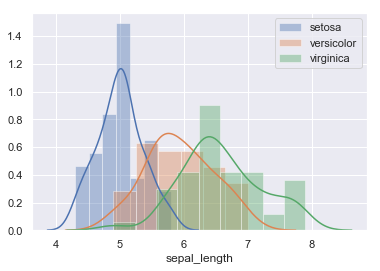

In [13]:
# sepal_length这个属性的分布
sns.distplot(df["sepal_length"][df["label"]=="setosa"])
sns.distplot(df["sepal_length"][df["label"]=="versicolor"])
sns.distplot(df["sepal_length"][df["label"]=="virginica"])
plt.legend(['setosa', 'versicolor', 'virginica'])

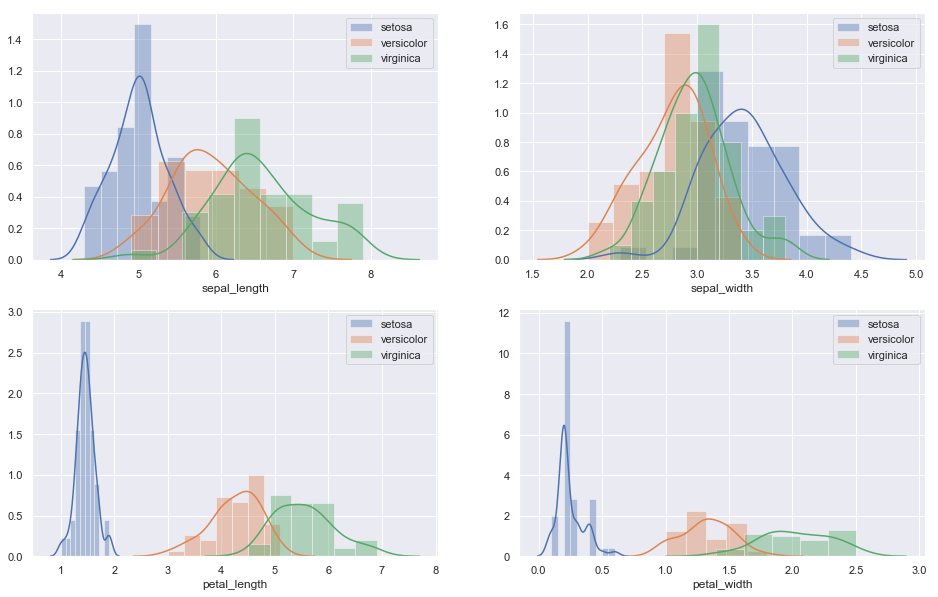

In [14]:
# 看看所有属性的
fig, axs =plt.subplots(2,2,figsize=(16,10))

columns = [['sepal_length', 'sepal_width'],['petal_length', 'petal_width']]

for row_index,row in enumerate(columns):
    for col_index,col in enumerate(row):
        ax = axs[row_index, col_index]
        sns.distplot(df[col][df["label"]=="setosa"], ax=ax)
        sns.distplot(df[col][df["label"]=="versicolor"], ax=ax)
        sns.distplot(df[col][df["label"]=="virginica"], ax=ax)
        ax.legend(['setosa', 'versicolor', 'virginica'])

In [15]:
# 可以看到'petal_length', 'petal_width'属性似乎区分的比较明显

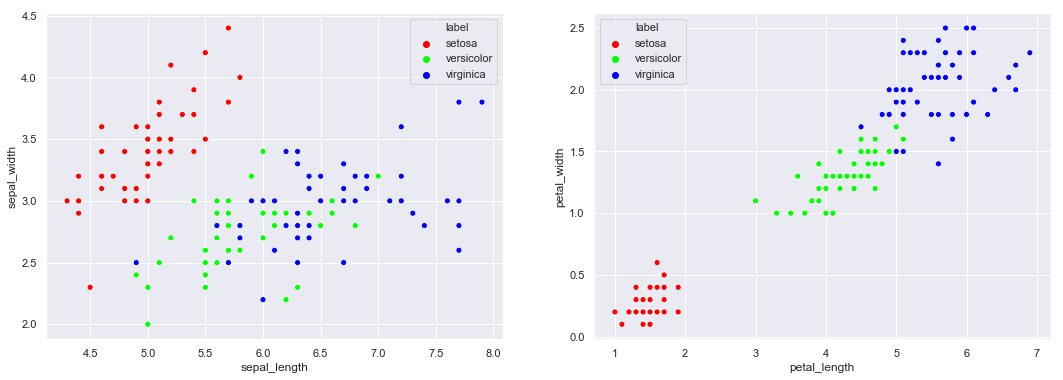

In [16]:
fig, axs = plt.subplots(1,2, figsize=(18,6))
sns.scatterplot(x="sepal_length", y="sepal_width", hue="label", data=df, ax=axs[0],
                palette=["#ff0000","#00ff00","#0000ff"])
sns.scatterplot(x="petal_length", y="petal_width", hue="label", data=df, ax=axs[1],
                palette=["#ff0000","#00ff00","#0000ff"])

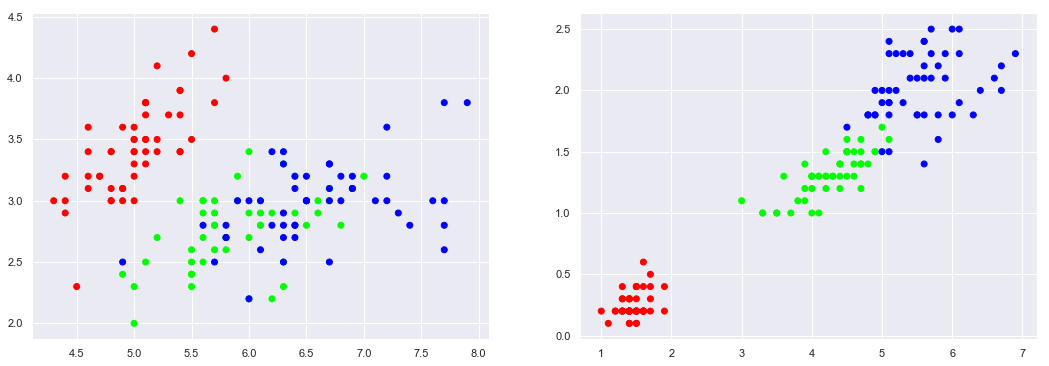

In [17]:
# 使用matplotlib画图
from matplotlib.colors import ListedColormap
fig, axs = plt.subplots(1,2, figsize=(18,6))
axs[0].scatter(df["sepal_length"], df["sepal_width"], c=y, 
               cmap=ListedColormap(['#FF0000','#00FF00','#0000FF']))
axs[1].scatter(df["petal_length"], df["petal_width"], 
               c=df["label"].map({"setosa":'#FF0000',"versicolor":'#00FF00',"virginica":'#0000FF'}) )

## 训练预测

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [20]:
X_train.shape, X_test.shape

((120, 4), (30, 4))

In [21]:
y_test

array([1, 0, 1, 1, 0, 0, 2, 1, 0, 2, 0, 1, 1, 2, 0, 1, 2, 2, 2, 1, 2, 1,
       0, 0, 2, 1, 2, 2, 0, 2])

In [22]:
# 归一化
mms = MinMaxScaler()

X_train = mms.fit_transform(X_train)
X_test = mms.transform(X_test)

In [23]:
#knn = KNeighborsClassifier(n_neighbors=4)
knn = KNeighborsClassifier(n_neighbors=10, weights="distance")

knn.fit(X_train, y_train)
y_predict = knn.predict(X_test)
knn.score(X_test, y_test)

0.9666666666666667

In [24]:
knn = KNeighborsClassifier(n_neighbors=10, weights="distance")

knn.fit(X_train[:,:2], y_train)
knn.score(X_test[:,:2], y_test)

0.8

In [25]:
knn = KNeighborsClassifier(n_neighbors=10, weights="distance")

knn.fit(X_train[:,2:], y_train)
knn.score(X_test[:,2:], y_test)

1.0

部分的属性还是不如全部的属性

## 可视化预测所有的数据

### np.meshgrid 和 np.ravel

In [26]:
a = np.array([1,2,3])
b = np.array([11,12,13,14,15])

In [27]:
av, bv = np.meshgrid(a, b)
display(av, bv)

array([[1, 2, 3],
       [1, 2, 3],
       [1, 2, 3],
       [1, 2, 3],
       [1, 2, 3]])

array([[11, 11, 11],
       [12, 12, 12],
       [13, 13, 13],
       [14, 14, 14],
       [15, 15, 15]])

In [28]:
display(np.ravel(av), np.ravel(bv))

array([1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3])

array([11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15])

相当于实现了笛卡尔集

In [29]:
pd.DataFrame({"a": np.ravel(av), "bv": np.ravel(bv)})

,a,bv
0,1,11
1,2,11
2,3,11
3,1,12
4,2,12
5,3,12
6,1,13
7,2,13
8,3,13
9,1,14


### 可视化预测所有

In [30]:
#定义KNN分类器
clf = KNeighborsClassifier(n_neighbors=10, weights="distance")

In [31]:
# 第1步：训练分类器
clf.fit(X[:,:2],y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='distance')

In [32]:
# 图片的显示范围
x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
y_min, y_max = X[:,1].min()-1, X[:,1].max()+1

In [33]:
# 图片的背景显示坐标
xx,yy = np.meshgrid(np.arange(x_min,x_max,0.02),np.arange(y_min,y_max,0.02))

In [34]:
# 第2步：预测
Z = clf.predict(np.c_[xx.ravel(),yy.ravel()])
z = Z.reshape(xx.shape)

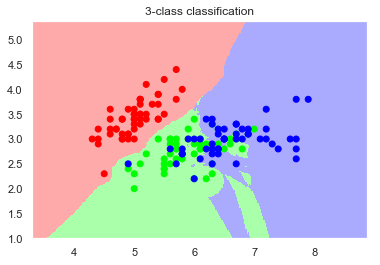

In [35]:
# 显示背景的颜色
cmap_background = ListedColormap(['#FFAAAA','#AAFFAA','#AAAAFF'])
plt.pcolormesh(xx,yy,z,cmap=cmap_background)

# 显示点的颜色
cmap_species = ListedColormap(['#FF0000','#00FF00','#0000FF'])
plt.scatter(X[:,0],X[:,1],c = y,cmap=cmap_species)

plt.xlim(xx.min(),xx.max())

plt.ylim(yy.min(),yy.max())

plt.title('3-class classification')

plt.show()

In [36]:
# np.r_是按列连接两个矩阵，就是把两矩阵上下相加，要求列数相等。
# np.c_是按行连接两个矩阵，就是把两矩阵左右相加，要求行数相等。
np.c_[xx.ravel(),yy.ravel()]

array([[3.3 , 1.  ],
       [3.32, 1.  ],
       [3.34, 1.  ],
       ...,
       [8.84, 5.38],
       [8.86, 5.38],
       [8.88, 5.38]])

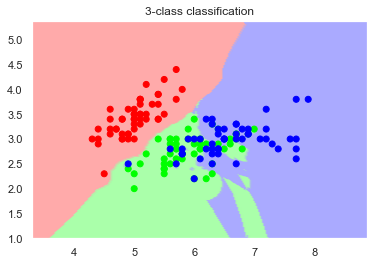

In [37]:
# 显示背景的颜色
cmap_background = ListedColormap(['#FFAAAA','#AAFFAA','#AAAAFF'])
plt.scatter(xx.ravel(), yy.ravel(), c=Z,cmap=cmap_background)

# 显示点的颜色
cmap_species = ListedColormap(['#FF0000','#00FF00','#0000FF'])
plt.scatter(X[:,0],X[:,1],c = y,cmap=cmap_species)

plt.xlim(xx.min(),xx.max())

plt.ylim(yy.min(),yy.max())

plt.title('3-class classification')

plt.show()

pcolormesh 明显比 scatter画图快

**数据标准化后再预测**

(1.0, 5.380000000000004)

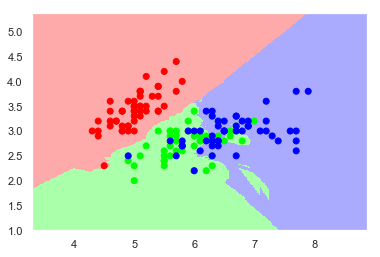

In [38]:
knn = KNeighborsClassifier(n_neighbors=10, weights="distance")

X_predict = np.c_[xx.ravel(),yy.ravel()]
mms = MinMaxScaler()
X_train = mms.fit_transform(X[:,:2])
X_test = mms.transform(X_predict)

knn.fit(X_train, y)

y_predict = knn.predict(X_test)

# 显示背景的颜色
cmap_background = ListedColormap(['#FFAAAA','#AAFFAA','#AAAAFF'])
plt.pcolormesh(xx, yy, y_predict.reshape(xx.shape), cmap=cmap_background)

# 显示点的颜色
cmap_species = ListedColormap(['#FF0000','#00FF00','#0000FF'])
plt.scatter(X[:,0], X[:,1], c = y, cmap=cmap_species)

plt.xlim(xx.min(),xx.max())
plt.ylim(yy.min(),yy.max())

(-0.9, 3.4800000000000044)

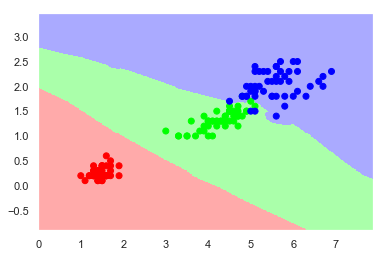

In [39]:
# 图片的显示范围
x_min, x_max = X[:,2].min()-1, X[:,2].max()+1
y_min, y_max = X[:,3].min()-1, X[:,3].max()+1

# 图片的背景显示坐标
xx,yy = np.meshgrid(np.arange(x_min,x_max,0.02),np.arange(y_min,y_max,0.02))

knn = KNeighborsClassifier(n_neighbors=10, weights="distance")

X_predict = np.c_[xx.ravel(),yy.ravel()]
mms = MinMaxScaler()
X_train = mms.fit_transform(X[:,2:])
X_test = mms.transform(X_predict)

knn.fit(X_train, y)

y_predict = knn.predict(X_test)

# 显示背景的颜色
cmap_background = ListedColormap(['#FFAAAA','#AAFFAA','#AAAAFF'])
plt.pcolormesh(xx, yy, y_predict.reshape(xx.shape), cmap=cmap_background)

# 显示点的颜色
cmap_species = ListedColormap(['#FF0000','#00FF00','#0000FF'])
plt.scatter(X[:,2], X[:,3], c = y, cmap=cmap_species)

plt.xlim(xx.min(),xx.max())
plt.ylim(yy.min(),yy.max())

In [40]:
xx.shape, yy.shape

((220, 395), (220, 395))

In [41]:
xx

array([[0.  , 0.02, 0.04, ..., 7.84, 7.86, 7.88],
       [0.  , 0.02, 0.04, ..., 7.84, 7.86, 7.88],
       [0.  , 0.02, 0.04, ..., 7.84, 7.86, 7.88],
       ...,
       [0.  , 0.02, 0.04, ..., 7.84, 7.86, 7.88],
       [0.  , 0.02, 0.04, ..., 7.84, 7.86, 7.88],
       [0.  , 0.02, 0.04, ..., 7.84, 7.86, 7.88]])

In [42]:
yy

array([[-0.9 , -0.9 , -0.9 , ..., -0.9 , -0.9 , -0.9 ],
       [-0.88, -0.88, -0.88, ..., -0.88, -0.88, -0.88],
       [-0.86, -0.86, -0.86, ..., -0.86, -0.86, -0.86],
       ...,
       [ 3.44,  3.44,  3.44, ...,  3.44,  3.44,  3.44],
       [ 3.46,  3.46,  3.46, ...,  3.46,  3.46,  3.46],
       [ 3.48,  3.48,  3.48, ...,  3.48,  3.48,  3.48]])

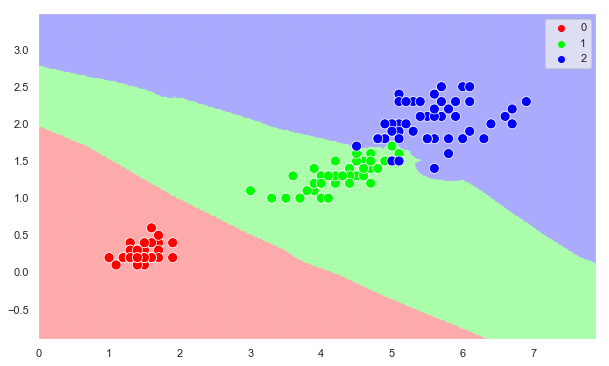

In [43]:
# 图片的显示范围
x_min, x_max = X[:,2].min()-1, X[:,2].max()+1
y_min, y_max = X[:,3].min()-1, X[:,3].max()+1

# 图片的背景显示坐标
xx,yy = np.meshgrid(np.arange(x_min,x_max,0.01),np.arange(y_min,y_max,0.01))

knn = KNeighborsClassifier(n_neighbors=10, weights="distance")

X_predict = np.c_[xx.ravel(),yy.ravel()]
mms = MinMaxScaler()
X_train = mms.fit_transform(X[:,2:])
X_test = mms.transform(X_predict)

knn.fit(X_train, y)

y_predict = knn.predict(X_test)


plt.figure(figsize=(10,6))

# 显示背景的颜色
cmap_background = ListedColormap(['#FFAAAA','#AAFFAA','#AAAAFF'])
ax = plt.pcolormesh(xx, yy, y_predict.reshape(xx.shape), cmap=cmap_background, alpha=0.6)

# 显示点的颜色
sns.scatterplot(X[:,2], X[:,3], hue=y, palette=['#FF0000','#00FF00','#0000FF'], s=100)

### plt.pcolormesh
总的来说, pcolormesh()的作用就是绘制背景图.

用pcolormesh()能画的, 用scatter()也能画, 但是经过测试, 发现用scatter()画的速度比pcolormesh()要慢不少